In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('youtube_data.csv')
df.head(10)

,Name (click to view profile),Date,Likes,isHearted,isPinned,Comment,(view source)
0,Yirrio S,01/02/05 16:10:40,0,no,no,Lol I thought they were Greta Thunbergs in the...,view comment
1,Non-Binary DragonBear,##############################################...,1,no,no,YOU JINXED US MALINDA!!!!! Its only been littl...,view comment
2,Moxie Miscellany,##############################################...,0,no,no,0:25 sums up the entire year perfectly.,view comment
3,Yirrio S,01/02/58 11:59:02,4,no,no,2020: Bring it on \n\n2021: How dare you,view comment
4,Melissa Takach,##############################################...,1,no,no,What about antimaskers and Karen’s?,view comment
5,MATHEA CONRAD,##############################################...,1,no,no,me still listening in January 2021,view comment
6,Sivie Lovegood,01/02/12 16:11:52,0,no,no,They should make this the second YouTube revind,view comment
7,Miss Oreo,14/01/21 13:47:14,0,no,no,I thought she was going to just scream for 6:3...,view comment
8,Miss Oreo,14/01/21 14:02:25,0,no,no,2021 is ruined from the first weeks as well......,view comment
9,ALHASSANE KEITA,14/01/21 16:18:37,0,no,no,*2020 IN A MUSICAL YA’LL*,view comment


In [3]:
data = df.rename({'Name (click to view profile)': 'Users', 'isHearted': 'Hearted','isPinned': 'Pinned',
                  '(view source)': 'Source'}, axis=1)

In [4]:
data.isnull().sum().sum()

0

In [5]:
data.dtypes

Users      object
Date       object
Likes       int64
Hearted    object
Pinned     object
Comment    object
Source     object
dtype: object

In [6]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])
data.head()

,Users,Date,Likes,Hearted,Pinned,Comment,Source
0,Yirrio S,2005-01-02 16:10:40,0,no,no,Lol I thought they were Greta Thunbergs in the...,view comment
3,Yirrio S,2058-01-02 11:59:02,4,no,no,2020: Bring it on \n\n2021: How dare you,view comment
6,Sivie Lovegood,2012-01-02 16:11:52,0,no,no,They should make this the second YouTube revind,view comment
7,Miss Oreo,2021-01-14 13:47:14,0,no,no,I thought she was going to just scream for 6:3...,view comment
8,Miss Oreo,2021-01-14 14:02:25,0,no,no,2021 is ruined from the first weeks as well......,view comment


In [7]:
data.count()

Users      8757
Date       8757
Likes      8757
Hearted    8757
Pinned     8757
Comment    8757
Source     8757
dtype: int64

In [8]:
data[data['Hearted']=='no'].count()

Users      8757
Date       8757
Likes      8757
Hearted    8757
Pinned     8757
Comment    8757
Source     8757
dtype: int64

In [9]:
data[data['Pinned']=='no'].count()

Users      8757
Date       8757
Likes      8757
Hearted    8757
Pinned     8757
Comment    8757
Source     8757
dtype: int64

In [10]:
data[data['Source']=='view comment'].count()

Users      8757
Date       8757
Likes      8757
Hearted    8757
Pinned     8757
Comment    8757
Source     8757
dtype: int64

In [11]:
data.drop(data.columns[[3,4,6]], axis=1, inplace=True)

In [12]:
data.head()

,Users,Date,Likes,Comment
0,Yirrio S,2005-01-02 16:10:40,0,Lol I thought they were Greta Thunbergs in the...
3,Yirrio S,2058-01-02 11:59:02,4,2020: Bring it on \n\n2021: How dare you
6,Sivie Lovegood,2012-01-02 16:11:52,0,They should make this the second YouTube revind
7,Miss Oreo,2021-01-14 13:47:14,0,I thought she was going to just scream for 6:3...
8,Miss Oreo,2021-01-14 14:02:25,0,2021 is ruined from the first weeks as well......


# Test preprocessing

In [13]:
from stopwords import get_stopwords
import string
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
stop_words=get_stopwords('en')

In [14]:
def text_processing(text):
    # remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # lowercase
    text = "".join([c.lower() for c in text])
    # remove stopwords
    text = " ".join([w for w in text.split() 
                     if w not in get_stopwords("en")])
    # replace numbers with a token
  #  text = re.sub('[0-9]+', 'number', text).lower()
    # stemming / lematizing (optional)
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split()])
    return text

In [15]:
data['Comment_clean'] = data['Comment'].apply(text_processing)

In [16]:
data.head()

,Users,Date,Likes,Comment,Comment_clean
0,Yirrio S,2005-01-02 16:10:40,0,Lol I thought they were Greta Thunbergs in the...,lol thought greta thunbergs background 🤣
3,Yirrio S,2058-01-02 11:59:02,4,2020: Bring it on \n\n2021: How dare you,2020 bring 2021 dare
6,Sivie Lovegood,2012-01-02 16:11:52,0,They should make this the second YouTube revind,make second youtube revind
7,Miss Oreo,2021-01-14 13:47:14,0,I thought she was going to just scream for 6:3...,thought going just scream 634 minute
8,Miss Oreo,2021-01-14 14:02:25,0,2021 is ruined from the first weeks as well......,2021 ruined first week well 2022 friend


In [17]:
docs = data['Comment_clean'].values
#docs

In [18]:
text_processing_vec = np.vectorize(text_processing)
docs = text_processing_vec(docs)

In [19]:
# tokenize
docs = [word_tokenize(d) for d in docs]

In [20]:
docs[:3]

[['lol', 'thought', 'greta', 'thunbergs', 'background', '🤣'],
 ['2020', 'bring', '2021', 'dare'],
 ['make', 'second', 'youtube', 'revind']]

In [21]:
from wordcloud import WordCloud

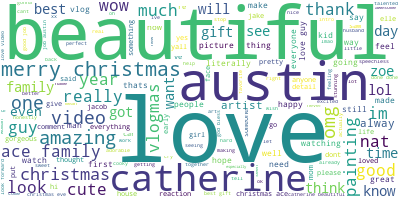

In [22]:

# Join the different processed titles together.
long_string = ','.join(list(data['Comment_clean'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

# try with topic modelling 

In [23]:
from gensim import corpora

In [24]:
dictionary = corpora.Dictionary(docs)
print(dictionary)

Dictionary(9274 unique tokens: ['background', 'greta', 'lol', 'thought', 'thunbergs']...)


In [25]:
corpus = [dictionary.doc2bow(d) for d in docs]
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


# LSI

In [26]:
from gensim.models.lsimodel import LsiModel

In [27]:
num_topics_lsi = 25

In [28]:
lsi = LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics_lsi, onepass=False, power_iters=5)

In [29]:
lsi[corpus][0]

[(0, 0.03381631138246481),
 (1, 0.0009597295090699712),
 (2, -0.0006789428088437152),
 (3, -0.013770396246866606),
 (4, -0.006447215749344067),
 (5, 0.0107508226919531),
 (6, -0.013959515160043425),
 (7, -0.035931531672113055),
 (8, -0.0234694433827852),
 (9, -0.018667021592575283),
 (10, 0.013039237376200755),
 (11, -0.024621591871288907),
 (12, 0.006046797390180047),
 (13, -0.025410701244051224),
 (14, -0.009104875989705701),
 (15, -0.007887106244672546),
 (16, 0.0028531208882893373),
 (17, -0.008249443467656848),
 (18, 0.018116329422927947),
 (19, 0.037248158575757244),
 (20, -0.013604805165687364),
 (21, -0.005615007777039523),
 (22, 0.027007145489573968),
 (23, -0.051947842998251816),
 (24, -0.013716802892395649)]

In [30]:
lsi.print_topics(num_topics_lsi)

[(0,
  '0.579*"’" + 0.221*"s" + 0.197*"know" + 0.189*"just" + 0.166*"love" + 0.161*"want" + 0.160*"can" + 0.158*"christmas" + 0.148*"i" + 0.142*"im"'),
 (1,
  '0.580*"’" + -0.241*"know" + -0.237*"im" + 0.235*"s" + -0.226*"want" + -0.189*"just" + -0.185*"people" + -0.149*"going" + 0.147*"i" + -0.128*"will"'),
 (2,
  '0.999*"done" + 0.014*"shut" + -0.010*"’" + -0.009*"know" + -0.008*"want" + -0.006*"can" + -0.005*"people" + -0.005*"will" + -0.005*"going" + -0.005*"think"'),
 (3,
  '-0.585*"love" + -0.425*"christmas" + 0.196*"know" + -0.181*"family" + 0.179*"’" + 0.169*"want" + -0.168*"merry" + -0.140*"beautiful" + -0.127*"video" + -0.125*"year"'),
 (4,
  '0.504*"christmas" + -0.432*"beautiful" + -0.299*"love" + -0.297*"catherine" + -0.227*"austin" + 0.216*"year" + -0.154*"s" + 0.132*"i" + -0.113*"gift" + 0.109*"im"'),
 (5,
  '-0.597*"love" + 0.413*"christmas" + 0.407*"beautiful" + 0.213*"catherine" + 0.188*"austin" + 0.185*"merry" + -0.143*"video" + -0.127*"much" + 0.125*"like" + 0.112*"

# LDA

In [31]:
from gensim.models.ldamodel import LdaModel

In [32]:
num_topics_lda = 25

In [33]:
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics_lda, update_every=1, passes=5, alpha='symmetric')

In [34]:
lda[corpus[0]]

[(0, 0.14931531), (14, 0.48416296), (18, 0.24016327)]

In [35]:
lda.get_document_topics(corpus[0])

[(0, 0.1493165), (14, 0.4839548), (18, 0.24036928)]

In [36]:
lda.print_topics(num_topics_lda)

[(0,
  '0.247*"family" + 0.035*"christmas" + 0.026*"big" + 0.024*"stay" + 0.022*"present" + 0.019*"safe" + 0.018*"fact" + 0.017*"totally" + 0.014*"around" + 0.014*"now"'),
 (1,
  '0.152*"best" + 0.105*"ever" + 0.065*"gift" + 0.035*"she" + 0.034*"made" + 0.031*"cry" + 0.027*"he" + 0.021*"mama" + 0.019*"another" + 0.019*"part"'),
 (2,
  '0.261*"christmas" + 0.144*"merry" + 0.045*"love" + 0.040*"piece" + 0.026*"everyone" + 0.024*"bless" + 0.023*"god" + 0.023*"yes" + 0.020*"❤" + 0.015*"hope"'),
 (3,
  '0.096*"“" + 0.084*"”" + 0.050*"said" + 0.047*"comment" + 0.043*"looking" + 0.036*"🥺" + 0.028*"cause" + 0.027*"mean" + 0.026*"true" + 0.022*"idea"'),
 (4,
  '0.545*"beautiful" + 0.040*"omg" + 0.039*"love" + 0.039*"facial" + 0.020*"soooo" + 0.020*"car" + 0.018*"really" + 0.015*"looked" + 0.012*"heart" + 0.011*"🥺❤️"'),
 (5,
  '0.155*"gift" + 0.135*"guy" + 0.081*"love" + 0.061*"great" + 0.055*"gorgeous" + 0.054*"mommy" + 0.041*"loved" + 0.030*"hi" + 0.026*"much" + 0.019*"really"'),
 (6,
  '0.115

In [37]:
import pyLDAvis.gensim
import pyLDAvis

vis = pyLDAvis.gensim.prepare(topic_model=lda, corpus=corpus, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

# try with emoji

In [38]:
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

In [39]:
# convert emojis into word
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, ("".join(UNICODE_EMO[emot].replace(",","").replace(":","")+",")))
    return text

In [40]:
#"_".join(UNICODE_EMO['😭'].replace(",","").replace(":","")+",").split()[0]

In [41]:
#UNICODE_EMO

In [42]:
docs_one = np.concatenate(docs)
docs_str=','.join(list(docs_one))
#docs_str

In [43]:
# print(uni'🚈')
# ('🚈')
print(ord('🚈'))

print(ord('-'))
print(ord('A'))

# "🚈".

128648
45
65


In [44]:
#example
text1 = "Hilarious 😂. The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒"
convert_emojis(text1)

'Hilarious face_with_tears_of_joy,. The feeling of making a sale smiling_face_with_sunglasses,, The feeling of actually fulfilling orders unamused_face,'

In [45]:
#convert_emojis(docs_str)

In [46]:
def split(word): 
    return [char for char in word]  

In [47]:
#filter the emojis that haven't be decode

l =[]

for letter in docs_str:
    char = split(letter)
    for char in letter:
        if ord(char) >=5000:
            if char not in l:
                l.append(char)

In [48]:
len(l)

434

In [49]:
'\u200d'.encode()

b'\xe2\x80\x8d'

In [50]:
#emoji left

print(l)

['🤣', '’', '🤦', '🏼', '\u200d', '♀', '️', '🙁', '🥺', '😢', '😭', '❤', '😔', '“', '”', '⚡', '🖤', '🙌', '👍', '🙂', '🎄', '😃', '🥛', '🥳', '🤩', '🍄', '🙆', '🤤', '😍', '😋', '💕', '👌', '🍪', '🎅', '🏽', '⛄', '🙏', '🌸', '😘', '💚', '🥰', '😉', '🤞', '😂', '💖', '😅', '😁', '😼', '☺', '🏾', '✨', '❄', '☃', '🌲', '😎', '💗', '😧', '🎉', '🎊', '🍾', '😻', '♥', '🤗', '👸', '🌎', '😄', '‼', '😌', '😚', '😐', '🙊', '\U0001f972', '🤍', '♡', '︎', '🅗', '🅔', '🅨', '😊', '😜', '😱', '🙋', '✋', '🏻', '😳', '😆', '🚪', '🏃', '💓', '🤪', '👋', '👀', '💜', '👼', '💋', '😿', '💭', '🤛', '👿', '😇', '👩', '👨', '💃', '🙄', '💞', '👴', '🏿', '😝', '🌺', '💔', '🅛', '🅞', '🅥', '🅘', '🅤', '🤟', '💍', '💘', '😏', '😩', '🙃', '🧑', '💙', '💯', '🎁', '🎀', '💛', '😹', '👇', '🏡', '📱', '\U0001f90c', '💟', '❣', '😺', '🙀', '👁', '👄', '😗', '😑', '💀', '😸', '😬', '🤥', '🙈', '✌', '😥', '😪', '🤧', '😀', '🧢', '🔥', '😒', '😮', '🦖', '🦋', '🤭', '😓', '🌚', '📈', '😛', '😫', '😡', '𝓶', '𝓸', '𝓽', '𝓲', '𝓿', '𝓪', '𝓷', '𝓜', '𝓔', '𝓡', '𝓨', '𝓒', '𝓗', '𝓘', '𝓢', '𝓣', '𝓐', '🎶', '🤙', '💅', '😖', '👑', '🌹', '—', '🤚', '👉', '👈', '👏', '🧍', '😽', '🎼', '🎵', '

# try another emoji package 

In [51]:
import emoji
from emoji import EMOJI_ALIAS_UNICODE_ENGLISH as em

In [52]:
import re 
count=0;
for s in em:
#     print(s)
    
    x = re.search("(:one:)",s)
    if(x !=None):
        print(x)
        print(count)
        print(s)
    count+=1

<re.Match object; span=(0, 5), match=':one:'>
4048
:one:


em

In [53]:
emoji.demojize(str(l)) #since like it worked 

"[':rolling_on_the_floor_laughing:', '’', ':person_facepalming:', ':medium-light_skin_tone:', '\\u200d', ':female_sign:', '', ':slightly_frowning_face:', ':pleading_face:', ':crying_face:', ':loudly_crying_face:', ':red_heart:', ':pensive_face:', '“', '”', ':high_voltage:', ':black_heart:', ':raising_hands:', ':thumbs_up:', ':slightly_smiling_face:', ':Christmas_tree:', ':grinning_face_with_big_eyes:', ':glass_of_milk:', ':partying_face:', ':star-struck:', ':mushroom:', ':person_gesturing_OK:', ':drooling_face:', ':smiling_face_with_heart-eyes:', ':face_savoring_food:', ':two_hearts:', ':OK_hand:', ':cookie:', ':Santa_Claus:', ':medium_skin_tone:', ':snowman_without_snow:', ':folded_hands:', ':cherry_blossom:', ':face_blowing_a_kiss:', ':green_heart:', ':smiling_face_with_hearts:', ':winking_face:', ':crossed_fingers:', ':face_with_tears_of_joy:', ':sparkling_heart:', ':grinning_face_with_sweat:', ':beaming_face_with_smiling_eyes:', ':cat_with_wry_smile:', ':smiling_face:', ':medium-da

let's work from beginning 

In [54]:
#emoji.demojize(docs_str)

In [55]:
# for further use, replace one string to arrays and replace the colon
l = []
docs_new = docs.copy()
for doc in docs_new:
    d= []
    for i, word in enumerate(doc):
        w = emoji.demojize(word).replace(':','')
        d.append(w)
    l.append(d)

In [56]:
#l

In [57]:
#docs

# Basic Emoji statistics 

In [58]:
#calculate total emojis in comments
emoji_descriptions=[]
for character in em:
    emoji_descriptions.append(character.replace(':','') )
    
count_emoji_total= 0
for comment in l:
    for word in comment:         
        if word in emoji_descriptions: 
            
            count_emoji_total+=1
            

print('There are in total ' +str(count_emoji_total)+' emojis in the comments.')

There are in total 6528 emojis in the comments.


In [59]:
#calculate total words in comments
count_word_total = 0
for comment in l:
    count_word_total +=  len(comment)
        

print('There are in total ' +str(count_word_total)+' words in the comments.')

There are in total 74465 words in the comments.


In [60]:
#calculate total comments contain emojis
count_comment_with_emoji=0
for comment in l:
    for word in comment:
        if word in emoji_descriptions:
            count_comment_with_emoji+=1
            break            

print('There are in total ' +str(count_comment_with_emoji)+' comments contain emojis.')

There are in total 3993 comments contain emojis.


In [61]:
print('There are in total ' +str(len(data))+' comments.')

There are in total 8757 comments.


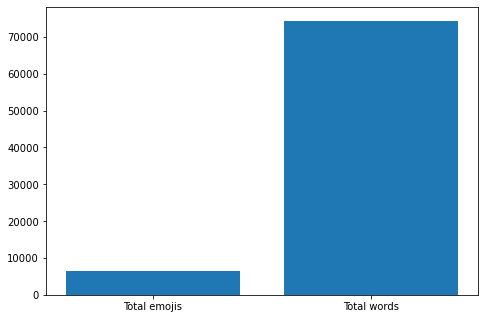

In [62]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['Total emojis','Total words']
number = [count_emoji_total,count_word_total]
ax.bar(names,number)
plt.show()

### Total emojis VS total words %

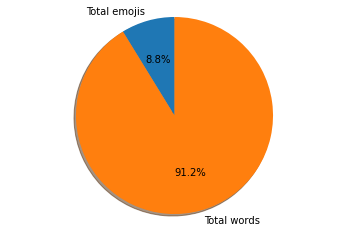

In [63]:
labels = 'Total emojis','Total words'
sizes = [count_emoji_total,count_word_total-count_emoji_total]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Comments with emojis VS comments without emojis %

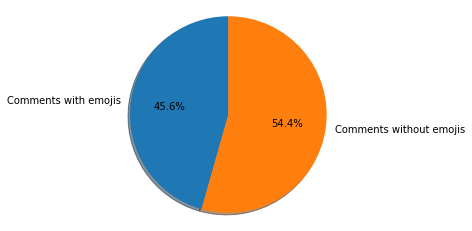

In [64]:
labels = 'Comments with emojis','Comments without emojis'
sizes = [count_comment_with_emoji,len(data)-count_comment_with_emoji]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Top used emoji

In [65]:
#Calculate the frequency of each emoji
emoji_dict={}

for comment in l:
    for word in comment:
        if word in emoji_descriptions:
            if word not in emoji_dict:
                emoji_dict[word]=1
            else:
                emoji_dict[word]+=1

In [66]:
emoji_dict_TOP20={k: v for k, v in sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True)[:20]}
emoji_dict_TOP20

{'family': 579,
 'one': 454,
 'gift': 426,
 'm': 385,
 'red_heart': 258,
 'girl': 196,
 'artist': 196,
 'man': 168,
 'watch': 142,
 'smiling_face_with_heart-eyes': 141,
 'art': 133,
 'new': 131,
 'car': 102,
 'house': 99,
 'back': 81,
 'cry': 80,
 'pleading_face': 75,
 'smiling_face_with_hearts': 74,
 'couple': 72,
 'ok': 71}

In [67]:
top20=list(emoji_dict_TOP20.keys())
o =[]
for t in top20:
    t = ''.join(':'+t+':')
    o.append(t)

In [68]:
top20_emoji_list=[]
for oo in o:
    oo=em[oo]
    top20_emoji_list.append(oo)
    print(oo)

👪
1️⃣
🎁
Ⓜ
❤
👧
🧑‍🎨
👨
⌚
😍
🎨
🆕
🚗
🏠
🔙
😢
🥺
🥰
👫
🆗


In [69]:
#top20_emoji_list

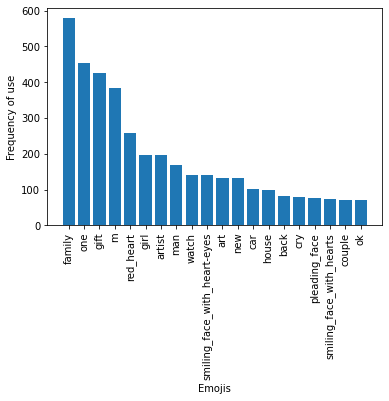

In [70]:
plt.bar(range(len(emoji_dict_TOP20)), list(emoji_dict_TOP20.values()), align='center')
plt.xticks(range(len(emoji_dict_TOP20)), list(emoji_dict_TOP20.keys()), rotation='vertical')
plt.xlabel('Emojis')
plt.ylabel('Frequency of use')
plt.show()